
# Fisica Computacional 3 Ay
### Transformadas de Fourier

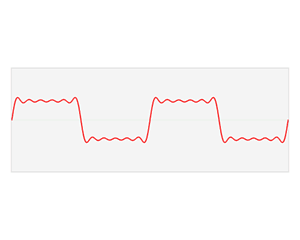




Si tenemos una función f periodica en un periodo de tiempo L, don Fourier gracias a su estudio de la ecuación del calor nos asegura que esta función puede ser escrita como una serie de la forma:

003a5e2ff71741a1bceab696b86024f53de6b427.svg

Los elementos aₙ y bₙ son conocidos como los coeficientes de Fourier, los cuales ponderan las contribuciones de coseno y seno, función par y función impar respectivamente.

##Ejemplo
En esta parte importamos la librerías que utilizaremos a lo lago
del codigo:

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sys

La siguiente linea activa la opcion de que, cuando le pidamos a python
imprimir un arreglo para revisar su contenido, no resuma su contenido
y muestre todos sus elementos.

In [5]:
np.set_printoptions(threshold=sys.maxsize)

Esta es la funcion que utilizamos de prueba pero en general
pueden reemplazar esta funcion por la que necesiten aproximar
con series de Fourier. Como argumento deben pasarle el arreglo
con los puntos en el eje x

In [6]:
def fun(x):
    tmp_y = np.zeros_like(x)
    tmp_y = np.cos(2 * x) * np.exp(x)
    return tmp_y

En las siguientes lineas se inicializan las variables que utilizaremos
para las series de Fourier.

dx define el tamaño del diferencial que se utilizara para resolver las
integrales numericas requeridas en la formula (Cap 7.1)

L es el tamaño del espacio en el eje x con el que trabajaremos.
Por ejemplo, si necesitamos encontrar las series de Fourier cuando
x pertenece al rango [2,8], L en este caso es 6.

Junto con la variable dx se establece el arreglo que funcionará como eje x para trabajar y
encontrar los valores de f (eje y). Recuerden que trabajamos con arreglos
ya que los metodos son numericos, es decir, punto a punto de una funcion.

In [7]:
dx = 0.001
L = 4 * np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
#print(x)
n = x.shape[0]
#print("cantidad de datos " + str(n))

En esta parte, una vez definido el arreglo con el eje x, procedemos a encontrar
los valores del eje y, en este caso la variable se llama f y contiene los elementos
del eje y calculados punto a punto con los valores de x.

In [8]:
f = fun(x)
#f = signal.sawtooth(x)
#print(f)

Pueden comprobar como luce la funcion que utilizaran graficandola con
plt de toda la vida.

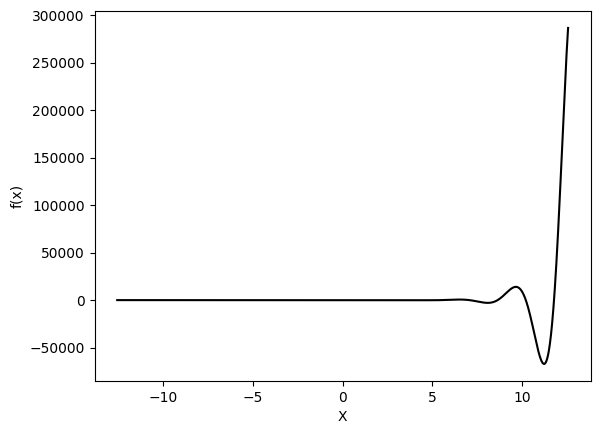

In [9]:
plt.clf()
plt.plot(x, f, '-k')
plt.ylabel('f(x)')
plt.xlabel('X')
plt.show()

Para comenzar con la transformada manual, debemos definir la variable que va a guardar
los elementos del eje y de la transformada. En este caso se llama fFS, la cual hace referencia
a los terminos f de la transformada. La inicializamos en 0 ya que ambas funciones parten en y = 0.
Si modifican este valor se provocaria un corrimiento en el eje y de todos los elementos de la transformada.
Pruebenlo!

In [ ]:
fFS = 0

Luego debemos definir el termino k, el cual corresponde a la cantidad de coeficientes a y b
que utilizaremos para realizar la transformada. Independiente de la cantidad de elementos que
posea el eje x, el numero k esta directamente relacionado con la precision con la cual la nueva
funcion (resultante de la transformada) se parece a la funcion original. Pueden variar este termino
y correr el programa para que visualizen que tan ajustada queda la nueva funcion con respecto a la
original.

In [ ]:
k = 60

Para guardar los coeficientes a y b que utilizaremos se inicializan 2 arreglos de tamano k,
ya que son k coeficientes.

In [ ]:
ak = np.zeros(k)
bk = np.zeros(k)

En la siguiente parte se calculan los coeficientes, para lo cual se inicializan los argumentos
de las funciones trigonometricas de las integrales (argcos y argsin) para obtener los coeficientes
y luego, en el arreglo fFS se van sumando los aportes de dicho coeficiente. Una forma similar
seria obtener en primer lugar los coeficientes y luego hacer otro ciclo para obtener los valores
de fFS. En este caso se hace de inmediato.

In [ ]:
for i in range(k):
    argcos = (2 * np.pi * (i) * x) / L
    ai = np.sum(f * np.cos(argcos) * dx)
    ak[i] = ai

    argsin = (2 * np.pi * (i+1) * x) / L
    bi = np.sum(f * np.sin(argsin) * dx)
    bk[i] = bi
    #print(B)

    fFS += ai * np.cos(argcos) + bi * np.sin(argsin)

En esta parte ploteamos ambas funciones, de rojo la funcion obtenida de la transformada de Fourier
y en azul la funcion original.

In [ ]:
plt.plot(x, f, '-b')
plt.plot(x, fFS, '-r')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

# Física Computacional 3 Ay
### Transformadas de Fourier con FFT
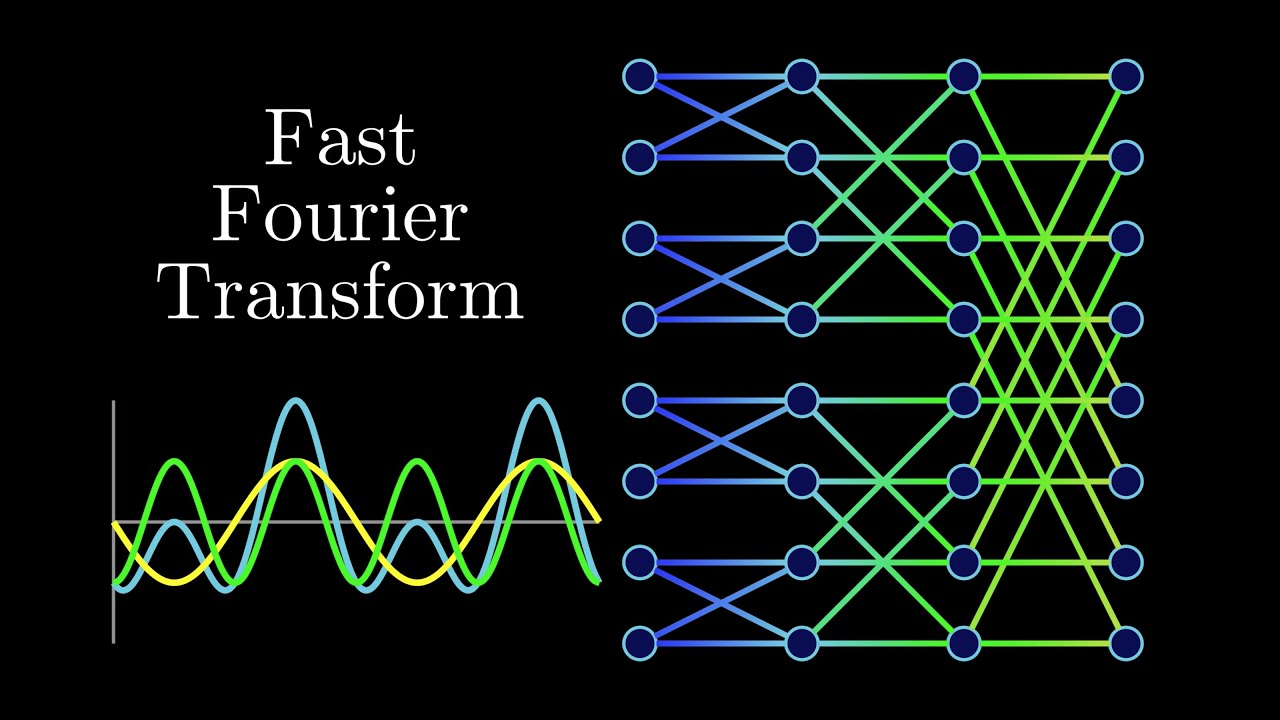

En esta ocación revisaremos una de las funciones de a librería Numpy la cual realiza transformadas de Fourier de una manera muy optimizada.
En primer lugar importaremos las librerías que utilizaremos a lo largo del código:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Luego cargaremos el archivo "sunspots.txt" con el cual trabajaremos.

In [ ]:
data = np.loadtxt('sunspots.txt', float)
print(data.shape)

(3144, 2)


Para realizar la transformada inicializaremos las variables n_x la cual contendrá el tamaño de los datos cargados del archivo, y la variable xi será un arreglo que representará nuestro eje X del mismo tamaño de los datos. Por otro lado limpiamos los datos importados del archivo de texto y los guardamos como arreglo en yi.

In [ ]:
n_x = data.shape[0]
xi = np.arange(n_x)
yi = data[:,1]

Luego, para obtener los coeficientes resultantes de la transformada utilizaremos la función fft contenida en el paquete fft de la librería de Numpy. Dichos coeficientes los guardaremos en la variable ck.

In [ ]:
ck = np.fft.fft(yi)

Una vez obtenidos los valores de los coeficientes podemos calcular la inversa con la función ifft que pertenece al mismo módulo fft. Estos valores de la función restaurada los guardaremos en el arreglo yiFS.

In [ ]:
yiFS = np.fft.ifft(ck)

Si graficamos estos datos obtenemos:

1.   La gráfica con los datos del archivo de texto (yi)
2.   La gráfica con los coeficientes en el dominio de la frecuencia (ck)

1.   la gráifca con los datos restaurados desde los coeficientes (yiFS)





In [ ]:
fig, axs = plt.subplots(3)
axs[0].plot(xi, yi, '-r')
axs[1].plot(ck, '-b')
axs[2].plot(xi, yiFS, '-g')
plt.show()

NameError: ignored

Podemos calcular el error entre los datos originales y los datos restaurados desde los coeficientes utilizando la diferencia cuadrada. Guardaremos este valor en la variable error.

In [ ]:
error = sum(abs(yi - yiFS) ** 2) / sum(yi ** 2) * 100
print(error)

1.534453372153621e-29


# Física Computacional 3 Ay
### Ejercicio tipo Prueba

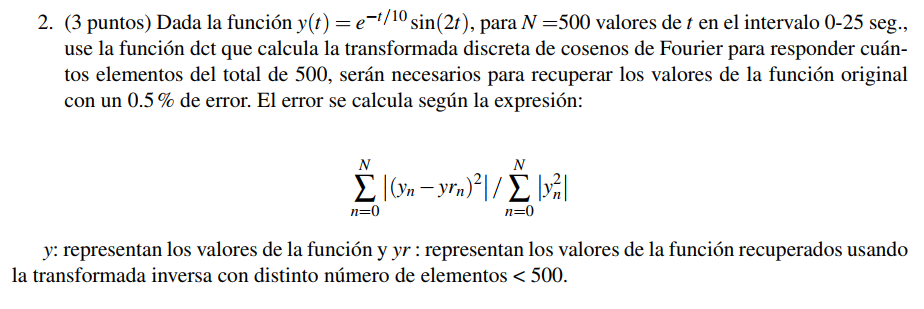

Primero importamos las librerías que utilizaremos a lo largo del código y luego definimos la función que se detalla en el enunciado:

In [10]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

def y(t):
	yi = np.exp(- t / 10) * np.sin(2 * t)
	return yi

Luego definimos las variables que utilizaremos para calcular los valores de yi (y = f(x)), ti como el arreglo del eje independiente y N como la cantidad de elementos del eje:

In [11]:
N = 500

ti = np.linspace(0, 25, N)

yi = y(ti)

Entonces, para obtener los coeficientes de la transformada discreta de cosenos utilizaremos la funcion dct de la librería scipy

In [12]:
ak_sc = dct(yi, norm='ortho')###Coeficientes con dft de scipy

Error con 73 coeficientes:  0.0486  %


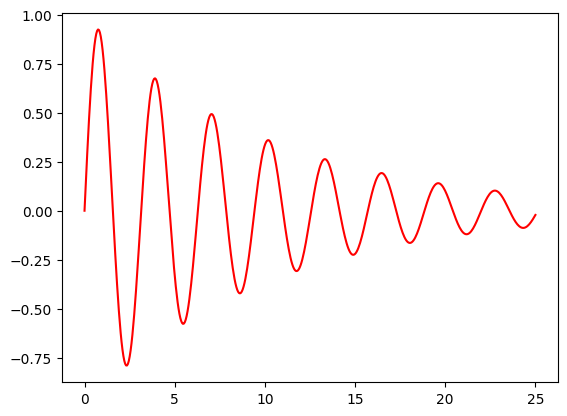

In [13]:
denom = sum(abs(yi)**2)

err = 0.05
err_out = 1
elementos = 10

while(err_out >= err):
	ventana = np.zeros(N)
	ventana[:elementos] = 1

	yiDCT = idct(ak_sc * ventana, norm='ortho')

	err_out = sum(abs(yi - yiDCT)**2) / denom * 100

	elementos += 1

print('Error con', elementos, 'coeficientes: ', round(err_out, 4), ' %')

plt.clf()
plt.plot(ti, yi, '-r')
plt.show()
